In [1]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
import glass_input.ortools_bin_packer

In [3]:

def plot_boxes(boxes):
    fig, ax = plt.subplots()

    n = len([b for b in boxes if "x" in b])  # count valid boxes
    cmap = plt.cm.get_cmap('tab20', n)  # use a colormap with n discrete colors

    # Loop through each box and add a rectangle patch
    for i, box in enumerate([b for b in boxes if "x" in b]):
        color = cmap(i)  # pick a color from the colormap
        rect = patches.Rectangle(
            (box["x"], box["y"] - box['h']),   # bottom-left corner
            box["w"],                         # width
            box["h"],                         # height
            linewidth=1.5,
            edgecolor='black',
            facecolor=color,
            label=str(box.get("id", i))
        )
        ax.add_patch(rect)

    # Adjust plot limits so all boxes are visible
    all_x = [b["x"] for b in boxes if "x" in b] + [b["x"] + b["w"] for b in boxes if "x" in b]
    all_y = [b["y"] for b in boxes if "y" in b] + [b["y"] - b["h"] for b in boxes if "y" in b]
    ax.set_xlim(min(all_x) - 1, max(all_x) + 1)
    ax.set_ylim(min(all_y) - 1, max(all_y) + 1)
    ax.set_aspect('equal', adjustable='box')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Box Plot using Matplotlib ({n} boxes)')
    plt.legend()
    plt.show()

In [4]:
windows = [
    {'x': 0, 'y': 2.00, 'w': 5.00, 'h': 2.00},
    {'x': 0, 'y': 4.00, 'w': 5.00, 'h': 2.00},
    {"w": 2.50, "h": 3.00},
    {"w": 6.00, "h": 1.50},
]


windows = [{'x': 0.0, 'y': 2.0, 'w': 5.0, 'h': 2.0},
           {'x': 0.0, 'y': 4.0, 'w': 5.0, 'h': 2.0},
           {'w': 2.5, 'h': 3.0, 'x': 0.0, 'y': 3.0, "move_weight": None},
           {'w': 6.0, 'h': 1.5, 'x': 0.0, 'y': 5.5}]

/tmp/ipykernel_47547/1840851973.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', n)  # use a colormap with n discrete colors


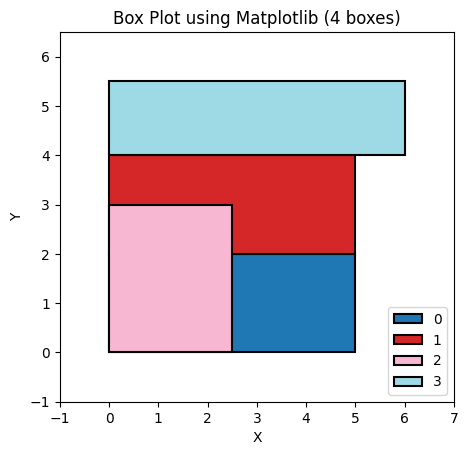

In [5]:
plot_boxes(windows)

In [6]:
glass_input.ortools_bin_packer.pack(windows, 10.24, 7.68, move_weight=1, zoom_weight=1)

True

In [7]:
boxes = [{**{k: v for k, v in win.items() if k != "fit"}, **win["fit"]} for win in windows]

/tmp/ipykernel_47547/1840851973.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('tab20', n)  # use a colormap with n discrete colors


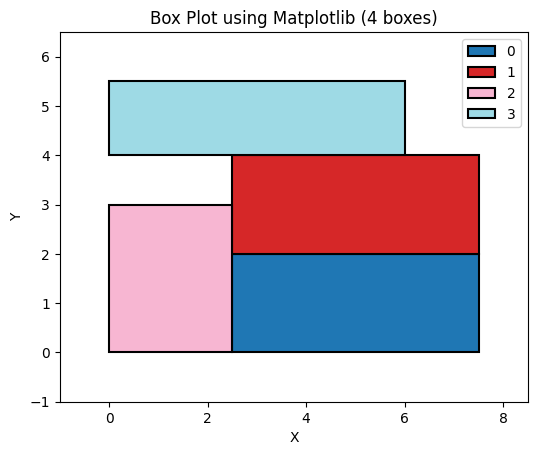

In [8]:
plot_boxes(boxes)

In [9]:
boxes

[{'x': 2.5, 'y': 2.0, 'w': 5.0, 'h': 2.0},
 {'x': 2.5, 'y': 4.0, 'w': 5.0, 'h': 2.0},
 {'w': 2.5, 'h': 3.0, 'x': 0.0, 'y': 3.0, 'move_weight': None},
 {'w': 6.0, 'h': 1.5, 'x': 0.0, 'y': 5.5}]